Cài đặt thư viện cần thiết

In [43]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
import os
from PIL import  Image
import pandas as pd
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from imblearn.under_sampling import EditedNearestNeighbours, ClusterCentroids, TomekLinks, RandomUnderSampler, NearMiss
from imblearn.over_sampling import BorderlineSMOTE, ADASYN, RandomOverSampler, SMOTE
from yellowbrick.classifier import DiscriminationThreshold

#visualization
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Đọc dữ liệu

In [44]:
telcom = pd.read_csv(r"WA_Fn-UseC_-Telco-Customer-Churn.csv")
#first few rows
for i in range(len(telcom.columns.tolist())):
    print(telcom.columns.tolist()[i],":",telcom[telcom.columns.tolist()[i]].unique())

telcom.head(10)  

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank tr

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [45]:
print ("Rows     : " ,telcom.shape[0])
print ("Columns  : " ,telcom.shape[1])
print ("\nFeatures : \n" ,telcom.columns.tolist())
print ("\nMissing values :  ", telcom.isnull().sum().values.sum())
print ("\nUnique values :  \n",telcom.nunique())

Rows     :  7043
Columns  :  21

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values :   0

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


Quy trình làm sạch và chuyển đổi dữ liệu


In [46]:
#Thao tác dữ liệu

#Đổi mục TotalCharges từ kiểu object sang numpy
telcom['TotalCharges'] = telcom["TotalCharges"].replace(" ",np.nan)
#Tiếp tục đổi sang float
telcom["TotalCharges"] = telcom["TotalCharges"].astype(float)

#Loại bỏ như
telcom = telcom[telcom["TotalCharges"].notnull()]
telcom = telcom.reset_index()[telcom.columns]

#Chuyển "Internet Service" thành "No"
replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in replace_cols : 
    telcom[i]  = telcom[i].replace({'No internet service' : 'No'})

#Chia tenure thành các nhóm
def tenure_lab(telcom) :
    
    if telcom["tenure"] <= 12 :
        return "Tenure_0-12"
    elif (telcom["tenure"] > 12) & (telcom["tenure"] <= 24 ):
        return "Tenure_12-24"
    elif (telcom["tenure"] > 24) & (telcom["tenure"] <= 48) :
        return "Tenure_24-48"
    elif (telcom["tenure"] > 48) & (telcom["tenure"] <= 60) :
        return "Tenure_48-60"
    elif telcom["tenure"] > 60 :
        return "Tenure_gt_60"
telcom["tenure_group"] = telcom.apply(lambda telcom:tenure_lab(telcom) ,axis = 1)

#Tạo biến chia thành 2 nhóm: churn và not_churn 
churn     = telcom[telcom["Churn"] == "Yes"]
not_churn = telcom[telcom["Churn"] == "No"]
#Tạo các biến để chia dữ liệu thành các mục liên quan đến nhau
Id_col     = ['customerID']
target_col = ["Churn"]
cat_cols   = telcom.nunique()[telcom.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in telcom.columns if x not in cat_cols + target_col + Id_col]

Chuyển dạng dữ liệu có thể thành 0 1,True False 

In [47]:
#Điều chỉnh cột customerID
print(np.array(telcom['customerID']))
Id_col     = ['customerID']
#tách phần chữ và phần số trong customerID
for i in range(len(telcom['customerID'])):
    telcom['customerID'][i] = telcom['customerID'][i].split("-")[0]
#Cột mục tiêu
target_col = ["Churn"]
#Phân loại các cột:
cat_cols   = telcom.nunique()[telcom.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
#Cột số:
num_cols   = [x for x in telcom.columns if x not in cat_cols + target_col + Id_col]
#Cột nhị phân:
bin_cols   = telcom.nunique()[telcom.nunique() == 2].keys().tolist()
#Cột nhiều giá trị:
multi_cols = [i for i in cat_cols if i not in bin_cols]
le = LabelEncoder()
for i in bin_cols :
    telcom[i] = le.fit_transform(telcom[i])

telcom.head(10)

['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590,0,0,1,0,1,0,No phone service,DSL,0,...,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,Tenure_0-12
1,5575,1,0,0,0,34,1,No,DSL,1,...,0,0,0,One year,0,Mailed check,56.95,1889.50,0,Tenure_24-48
2,3668,1,0,0,0,2,1,No,DSL,1,...,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,Tenure_0-12
3,7795,1,0,0,0,45,0,No phone service,DSL,1,...,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Tenure_24-48
4,9237,0,0,0,0,2,1,No,Fiber optic,0,...,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,Tenure_0-12
5,9305,0,0,0,0,8,1,Yes,Fiber optic,0,...,0,1,1,Month-to-month,1,Electronic check,99.65,820.50,1,Tenure_0-12
6,1452,1,0,0,1,22,1,Yes,Fiber optic,0,...,0,1,0,Month-to-month,1,Credit card (automatic),89.10,1949.40,0,Tenure_12-24
7,6713,0,0,0,0,10,0,No phone service,DSL,1,...,0,0,0,Month-to-month,0,Mailed check,29.75,301.90,0,Tenure_0-12
8,7892,0,0,1,0,28,1,Yes,Fiber optic,0,...,1,1,1,Month-to-month,1,Electronic check,104.80,3046.05,1,Tenure_24-48
9,6388,1,0,0,1,62,1,No,DSL,1,...,0,0,0,One year,0,Bank transfer (automatic),56.15,3487.95,0,Tenure_gt_60


In [48]:
#Mã hoã cột nhị phân
le = LabelEncoder()
for i in bin_cols :
    telcom[i] = le.fit_transform(telcom[i])
    
#Sao chép cột cho cột đa giá trị
telcom = pd.get_dummies(data = telcom,columns = multi_cols)


#Chia tỷ lệ cột số
std = StandardScaler()
scaled = std.fit_transform(telcom[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

#bỏ các giá trị ban đầu hợp nhất các giá trị được chia tỷ lệ cho các cột số
df_telcom_og = telcom.copy()
telcom = telcom.drop(columns = num_cols,axis = 1)
telcom = telcom.merge(scaled,left_index=True,right_index=True,how = "left")

print(pd.get_dummies(multi_cols))

   Contract  InternetService  MultipleLines  PaymentMethod  tenure_group
0     False            False           True          False         False
1     False             True          False          False         False
2      True            False          False          False         False
3     False            False          False           True         False
4     False            False          False          False          True


In [49]:
#drop cot tenure
telcom = telcom.drop(columns = "tenure",axis = 1)

In [50]:
correlation=telcom.corr()
print(abs(correlation['Churn']).sort_values(ascending=0),'\n')

Churn                                      1.000000
Contract_Month-to-month                    0.404565
tenure_group_Tenure_0-12                   0.319628
InternetService_Fiber optic                0.307463
Contract_Two year                          0.301552
PaymentMethod_Electronic check             0.301455
InternetService_No                         0.227578
tenure_group_Tenure_gt_60                  0.226078
TotalCharges                               0.199484
MonthlyCharges                             0.192858
PaperlessBilling                           0.191454
Contract_One year                          0.178225
OnlineSecurity                             0.171270
TechSupport                                0.164716
Dependents                                 0.163128
SeniorCitizen                              0.150541
Partner                                    0.149982
PaymentMethod_Credit card (automatic)      0.134687
InternetService_DSL                        0.124141
PaymentMetho

KNN trên dữ liệu gốc


In [51]:
#Chia dữ liệu thành 2 phần: train và tes
train, test = train_test_split(telcom,test_size = .25 ,random_state = 111)
cols    = [i for i in telcom.columns if i not in Id_col + target_col]
train_X = train[cols]
train_Y = train[target_col]
test_X  = test[cols] 
test_Y  = test[target_col]

In [52]:
def telecom_churn_prediction_alg(algorithm,training_x,testing_x,
                                 training_y,testing_y,threshold_plot) :#model
    algorithm.fit(training_x,training_y)
    predictions   = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
    accuracy = accuracy_score(testing_y,predictions)
    precision = precision_score(testing_y,predictions)
    recall = recall_score(testing_y,predictions)
    f1 = f1_score(testing_y,predictions)
    True_positive_data = []
    
    for i in range(len(predictions)): 
        if predictions[i] == 1 and testing_y.values[i] == 1:
            True_positive_data.append(testing_x.index[i])  


    print("True positive data: ", True_positive_data)
    print(len(True_positive_data))
    print (algorithm)
    print ("\n Classification report : \n",classification_report(testing_y,predictions))
    print ("Accuracy Score : ",accuracy_score(testing_y,predictions))
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities[:,1])
    # Tính confusion matrix
    conf_matrix = confusion_matrix(testing_y, predictions)
    
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y,predictions)
    # Lấy tập dữ liệu true positive
    #plot roc curve
    trace1 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2),
                       )
    trace2 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))
    #plot confusion matrix
    trace3 = go.Heatmap(z = conf_matrix ,x = ["Not churn","Churn"],
                        y = ["Not churn","Churn"],
                        showscale  = False,colorscale = "Blues",name = "matrix",
                        xaxis = "x2",yaxis = "y2"
                       )
    
    layout = go.Layout(dict(title="Model performance" ,
                            autosize = False,height = 500,width = 800,
                            showlegend = False,
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(title = "false positive rate",
                                         gridcolor = 'rgb(255, 255, 255)',
                                         domain=[0, 0.6],
                                         ticklen=5,gridwidth=2),
                            yaxis = dict(title = "true positive rate",
                                         gridcolor = 'rgb(255, 255, 255)',
                                         zerolinewidth=1,ticklen=5,gridwidth=2),
                            margin = dict(b=200),
                            xaxis2=dict(domain=[0.7, 1],tickangle = 90,
                                        gridcolor = 'rgb(255, 255, 255)'),
                            yaxis2=dict(anchor='x2',gridcolor = 'rgb(255, 255, 255)')
                           )
                  )
    data = [trace1,trace2,trace3]
    fig = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)
    
    if threshold_plot == True : 
        visualizer = DiscriminationThreshold(algorithm)
        visualizer.fit(training_x,training_y)
        visualizer.poof()
    
    return accuracy, precision, recall, f1, testing_x.loc[True_positive_data]

Table = [["Model", "Precision(0)", "Recall(0)", "F1_score(0)", "Precision(1)", "Recall(1)", "F1_score(1)", "Accuracy"]]
def Return_Analisys(algorithm,training_x,testing_x,training_y,testing_y,table,name):
    algorithm.fit(training_x,training_y)
    Processed_table = classification_report(testing_y,algorithm.predict(testing_x)).split("\n")
    arr = [name]
    for idx, value in enumerate(Processed_table):
        if idx == 2:
            arr.append(value.split()[1])
            arr.append(value.split()[2])
            arr.append(value.split()[3])
        elif idx == 3:
            arr.append(value.split()[1])
            arr.append(value.split()[2])
            arr.append(value.split()[3])
        elif idx == 5:
            arr.append(value.split()[1])
    table.append(arr)
   
    print(table)
    return table

True positive data:  [354, 5263, 5774, 177, 6313, 6368, 4751, 5958, 4840, 4893, 3442, 6645, 542, 3720, 288, 6625, 2082, 1003, 3667, 5773, 4510, 722, 4966, 4440, 5882, 6142, 4221, 6598, 5297, 1384, 5590, 759, 5169, 2866, 721, 1232, 3556, 3489, 6941, 3625, 2064, 4854, 5381, 3130, 1697, 168, 6778, 2158, 3080, 1802, 6851, 3260, 5350, 2124, 6181, 5178, 1155, 1330, 5947, 992, 6607, 5279, 3420, 166, 1734, 2163, 2081, 6543, 679, 649, 2505, 925, 4939, 4074, 3025, 1145, 5115, 6116, 5803, 2001, 5564, 2573, 1480, 1405, 4056, 6529, 3328, 5248, 3969, 994, 2606, 931, 6425, 4523, 3932, 3073, 2450, 5732, 6511, 1281, 1778, 6278, 191, 824, 4091, 6228, 4875, 5975, 2521, 5031, 2203, 2099, 874, 2748, 4077, 6332, 2319, 4397, 2703, 3354, 3178, 802, 2872, 1785, 1174, 1204, 1084, 3739, 5015, 2698, 1985, 5980, 3987, 275, 5035, 5822, 1831, 5203, 6724, 3317, 2269, 6464, 6658, 878, 1400, 6820, 1670, 1551, 6671, 4819, 2119, 6590, 3632, 2864, 474, 3881, 3910, 6919, 4665, 498, 5166, 5351, 2681, 5459, 3545, 924, 5126, 

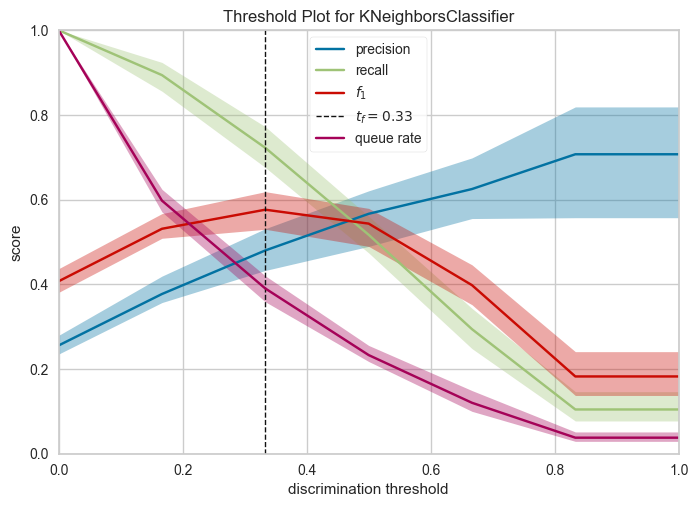

[['Model', 'Precision(0)', 'Recall(0)', 'F1_score(0)', 'Precision(1)', 'Recall(1)', 'F1_score(1)', 'Accuracy'], ['NoBalance_KNN', '0.82', '0.86', '0.84', '0.58', '0.50', '0.54', '0.76']]


,gender,SeniorCitizen,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60,MonthlyCharges,TotalCharges
354,0,1,0,0,0,1,0,0,0,1,...,False,True,False,False,True,False,False,False,-0.761147,-0.636722
5263,0,0,0,0,1,0,1,0,0,1,...,False,True,False,True,False,False,False,False,0.841043,-0.777373
5774,0,1,0,0,1,0,0,0,0,1,...,False,True,False,True,False,False,False,False,0.814450,-0.967965
177,0,1,0,0,1,1,0,0,0,0,...,False,False,False,True,False,False,False,False,0.387311,-0.785182
6313,0,0,0,0,1,0,0,0,0,1,...,False,True,False,True,False,False,False,False,0.472074,-0.873618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2180,1,0,1,1,1,1,0,0,0,0,...,False,True,False,False,True,False,False,False,-0.334007,-0.416989
82,0,0,1,0,1,0,0,1,0,0,...,False,False,False,True,False,False,False,False,0.344098,-0.788137
4225,0,0,0,0,1,0,0,0,0,0,...,False,False,True,True,False,False,False,False,0.171248,-0.976502
6473,1,0,0,0,1,0,0,1,0,1,...,False,True,False,True,False,False,False,False,1.218322,-0.962605


In [53]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                           weights='uniform')

_, _, _, _, tp = telecom_churn_prediction_alg(knn,train_X,test_X,
                             train_Y,test_Y,threshold_plot = True)

name = "NoBalance_KNN"
table = Return_Analisys(knn,train_X,test_X,train_Y,test_Y,Table,name)
tp

In [54]:
# convert False to 0 and True to 1 in tp dataframe
tp = tp*1
# add test_Y.loc[tp.index] to tp dataframe
tp['Churn'] = test_Y.loc[tp.index]
tp.corr()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60,MonthlyCharges,TotalCharges,Churn
gender,1.000000e+00,-3.198580e-17,0.177528,0.042630,-0.123497,-0.133858,-0.041001,0.082132,0.017461,-0.021158,...,0.041729,0.033647,-0.088434,0.094267,0.030235,0.030780,-0.089980,-0.100812,0.044343,NaN
SeniorCitizen,-3.198580e-17,1.000000e+00,0.075593,-0.233374,-0.042352,0.029260,0.047506,-0.006606,-0.111111,0.040780,...,0.082409,-0.052940,-0.151186,0.015694,0.127589,0.204980,-0.064416,0.069921,0.150196,NaN
Partner,1.775278e-01,7.559289e-02,1.000000,0.358596,0.070434,0.047555,0.099525,0.227477,0.047246,0.074866,...,-0.050615,-0.038018,-0.190000,0.111815,0.037891,0.154176,0.136342,0.180204,0.235810,NaN
Dependents,4.262958e-02,-2.333740e-01,0.358596,1.000000,0.064056,0.048325,0.057992,0.096895,0.031416,-0.072267,...,0.024040,-0.064056,-0.111277,0.144673,-0.053335,-0.053357,0.247465,0.038045,0.080522,NaN
PhoneService,-1.234972e-01,-4.235235e-02,0.070434,0.064056,1.000000,-0.001239,0.029892,0.009093,-0.037058,0.076365,...,-0.024431,-0.073767,-0.102849,0.052178,0.108074,-0.062072,0.027282,0.673027,0.155879,NaN
OnlineSecurity,-1.338576e-01,2.926029e-02,0.047555,0.048325,-0.001239,1.000000,0.005560,-0.010052,0.102411,0.070231,...,-0.044609,-0.048950,-0.107276,0.187819,-0.033066,-0.047982,-0.030157,0.095926,0.029592,NaN
OnlineBackup,-4.100051e-02,4.750596e-02,0.099525,0.057992,0.029892,0.005560,1.000000,0.162572,0.135731,0.073697,...,-0.048936,0.005030,-0.203411,-0.044308,0.216474,0.188356,0.160875,0.267969,0.381594,NaN
DeviceProtection,8.213184e-02,-6.606455e-03,0.227477,0.096895,0.009093,-0.010052,0.162572,1.000000,0.115613,0.195441,...,0.044371,-0.077085,-0.187026,0.112496,0.106087,0.044959,0.048939,0.297121,0.236130,NaN
TechSupport,1.746076e-02,-1.111111e-01,0.047246,0.031416,-0.037058,0.102411,0.135731,0.115613,1.000000,0.029129,...,-0.113312,0.084705,-0.132288,0.125553,0.077465,-0.051245,-0.032208,0.084064,0.126168,NaN
StreamingTV,-2.115829e-02,4.078047e-02,0.074866,-0.072267,0.076365,0.070231,0.073697,0.195441,0.029129,1.000000,...,0.101300,0.013570,-0.324566,0.197856,0.171173,0.093623,0.095319,0.494708,0.364117,NaN


In [55]:
# check if Contract_Two year is 1
tp[tp['Contract_Two year'] == 1]


,gender,SeniorCitizen,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60,MonthlyCharges,TotalCharges,Churn


In [56]:
tp.corr()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60,MonthlyCharges,TotalCharges,Churn
gender,1.000000e+00,-3.198580e-17,0.177528,0.042630,-0.123497,-0.133858,-0.041001,0.082132,0.017461,-0.021158,...,0.041729,0.033647,-0.088434,0.094267,0.030235,0.030780,-0.089980,-0.100812,0.044343,NaN
SeniorCitizen,-3.198580e-17,1.000000e+00,0.075593,-0.233374,-0.042352,0.029260,0.047506,-0.006606,-0.111111,0.040780,...,0.082409,-0.052940,-0.151186,0.015694,0.127589,0.204980,-0.064416,0.069921,0.150196,NaN
Partner,1.775278e-01,7.559289e-02,1.000000,0.358596,0.070434,0.047555,0.099525,0.227477,0.047246,0.074866,...,-0.050615,-0.038018,-0.190000,0.111815,0.037891,0.154176,0.136342,0.180204,0.235810,NaN
Dependents,4.262958e-02,-2.333740e-01,0.358596,1.000000,0.064056,0.048325,0.057992,0.096895,0.031416,-0.072267,...,0.024040,-0.064056,-0.111277,0.144673,-0.053335,-0.053357,0.247465,0.038045,0.080522,NaN
PhoneService,-1.234972e-01,-4.235235e-02,0.070434,0.064056,1.000000,-0.001239,0.029892,0.009093,-0.037058,0.076365,...,-0.024431,-0.073767,-0.102849,0.052178,0.108074,-0.062072,0.027282,0.673027,0.155879,NaN
OnlineSecurity,-1.338576e-01,2.926029e-02,0.047555,0.048325,-0.001239,1.000000,0.005560,-0.010052,0.102411,0.070231,...,-0.044609,-0.048950,-0.107276,0.187819,-0.033066,-0.047982,-0.030157,0.095926,0.029592,NaN
OnlineBackup,-4.100051e-02,4.750596e-02,0.099525,0.057992,0.029892,0.005560,1.000000,0.162572,0.135731,0.073697,...,-0.048936,0.005030,-0.203411,-0.044308,0.216474,0.188356,0.160875,0.267969,0.381594,NaN
DeviceProtection,8.213184e-02,-6.606455e-03,0.227477,0.096895,0.009093,-0.010052,0.162572,1.000000,0.115613,0.195441,...,0.044371,-0.077085,-0.187026,0.112496,0.106087,0.044959,0.048939,0.297121,0.236130,NaN
TechSupport,1.746076e-02,-1.111111e-01,0.047246,0.031416,-0.037058,0.102411,0.135731,0.115613,1.000000,0.029129,...,-0.113312,0.084705,-0.132288,0.125553,0.077465,-0.051245,-0.032208,0.084064,0.126168,NaN
StreamingTV,-2.115829e-02,4.078047e-02,0.074866,-0.072267,0.076365,0.070231,0.073697,0.195441,0.029129,1.000000,...,0.101300,0.013570,-0.324566,0.197856,0.171173,0.093623,0.095319,0.494708,0.364117,NaN


SMOTE 


True positive data:  [354, 1781, 5567, 377, 4726, 2568, 5677, 5263, 4951, 5774, 177, 6091, 6313, 27, 6023, 6368, 863, 3750, 2, 2524, 238, 4751, 1245, 5958, 1210, 4840, 4893, 3442, 6645, 5061, 2049, 542, 3720, 288, 2082, 1003, 637, 95, 6293, 3667, 5773, 5068, 4510, 2388, 722, 4966, 4440, 5882, 6142, 1287, 4221, 6598, 4803, 5868, 5297, 1384, 2999, 430, 5590, 759, 5169, 2866, 6247, 721, 1232, 4885, 3556, 3615, 3489, 2764, 6941, 3625, 2064, 4854, 3868, 5381, 1037, 6932, 4223, 6137, 1697, 168, 3602, 6778, 1976, 2158, 3597, 3467, 1472, 4038, 3080, 1802, 6435, 6851, 3260, 5350, 6030, 6160, 2124, 3870, 6181, 5178, 1155, 1330, 6582, 3365, 5947, 173, 992, 6607, 4410, 543, 5279, 6515, 3420, 166, 1734, 3861, 6888, 3559, 2163, 2081, 6543, 679, 5556, 6167, 3883, 649, 3707, 2505, 4082, 925, 3409, 4939, 4074, 2487, 3025, 1145, 5115, 6116, 453, 4645, 3368, 5803, 5706, 2001, 5564, 2573, 1480, 1405, 4056, 6529, 3328, 5248, 809, 3969, 185, 994, 2606, 6849, 151, 5816, 6480, 2633, 931, 6425, 6770, 4523, 658

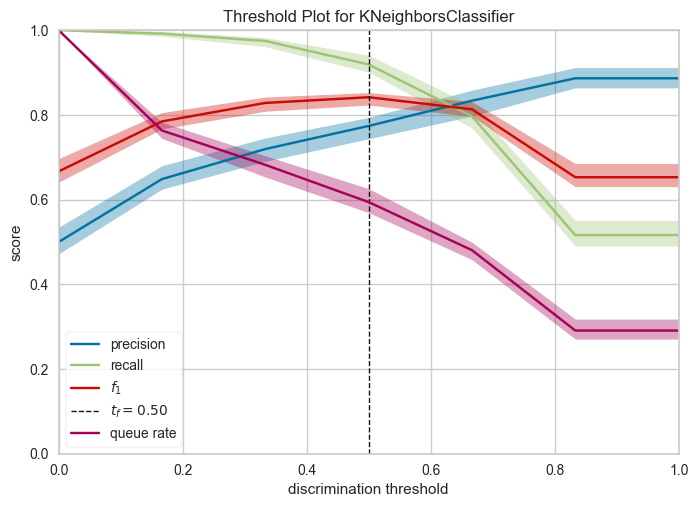

[['Model', 'Precision(0)', 'Recall(0)', 'F1_score(0)', 'Precision(1)', 'Recall(1)', 'F1_score(1)', 'Accuracy'], ['NoBalance_KNN', '0.82', '0.86', '0.84', '0.58', '0.50', '0.54', '0.76'], ['SMOTE_KNN', '0.93', '0.80', '0.86', '0.61', '0.84', '0.71', '0.81']]


In [57]:
cols    = [i for i in telcom.columns if i not in Id_col+target_col]
smote_X = telcom[cols]
smote_Y = telcom[target_col]

#Split train and test data
smote_train_X,smote_test_X,smote_train_Y,smote_test_Y = train_test_split(smote_X,smote_Y,
                                                                         test_size = .3 ,
                                                                         random_state = 0)

#oversampling minority class using smote
os = SMOTE(random_state=0)
os_smote_X,os_smote_Y = os.fit_resample(smote_train_X,smote_train_Y)
os_smote_X = pd.DataFrame(data = os_smote_X,columns=cols)
os_smote_Y = pd.DataFrame(data = os_smote_Y,columns=target_col)

knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                           weights='uniform')
telecom_churn_prediction_alg(knn,os_smote_X,test_X,
                             os_smote_Y,test_Y,threshold_plot = True)
name = "SMOTE_KNN"
table = Return_Analisys(knn,os_smote_X,test_X,os_smote_Y,test_Y,table,name)

RandomOverSampler

True positive data:  [354, 1781, 5567, 377, 3631, 4726, 2568, 5677, 5263, 4951, 5774, 177, 4690, 6091, 6313, 27, 6023, 6368, 863, 3750, 2, 238, 4751, 1245, 5958, 1210, 4840, 4893, 3442, 6645, 5061, 2049, 542, 3720, 288, 6625, 2082, 1003, 95, 6293, 3667, 5773, 5068, 4510, 2388, 722, 4966, 4440, 5882, 6142, 1287, 4221, 6598, 4803, 5868, 6897, 5297, 1384, 2999, 430, 5590, 759, 5169, 2866, 6247, 721, 1232, 4885, 3556, 3615, 3489, 318, 6941, 3625, 2064, 4854, 3868, 5381, 1037, 6932, 4223, 5104, 6137, 1697, 168, 3602, 6778, 1976, 2158, 3467, 1472, 4038, 3080, 1802, 6851, 3260, 5350, 6030, 6160, 2124, 6181, 5178, 1155, 1330, 6582, 3365, 5947, 173, 992, 6607, 4410, 3587, 543, 5279, 3420, 166, 1734, 3861, 6888, 3559, 2163, 2081, 5959, 6543, 679, 5556, 5899, 6958, 3883, 649, 2505, 4082, 925, 3409, 4939, 4074, 2487, 3025, 1145, 5115, 6116, 453, 4645, 3368, 6348, 5803, 5706, 2001, 5564, 2573, 1480, 1405, 4056, 6529, 3328, 5248, 3969, 185, 994, 2606, 6849, 151, 5816, 6480, 2633, 931, 6425, 6770, 45

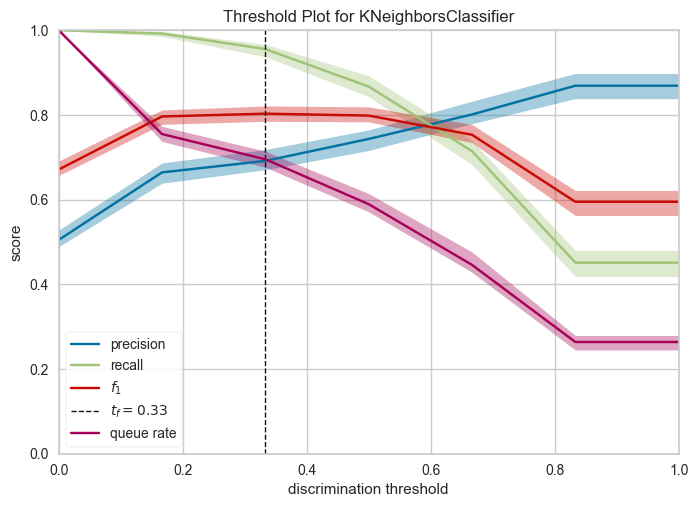

[['Model', 'Precision(0)', 'Recall(0)', 'F1_score(0)', 'Precision(1)', 'Recall(1)', 'F1_score(1)', 'Accuracy'], ['NoBalance_KNN', '0.82', '0.86', '0.84', '0.58', '0.50', '0.54', '0.76'], ['SMOTE_KNN', '0.93', '0.80', '0.86', '0.61', '0.84', '0.71', '0.81'], ['RandomOverSampler_KNN', '0.91', '0.74', '0.82', '0.55', '0.82', '0.66', '0.76']]


In [58]:
ros = RandomOverSampler() 
ros_smote_X,ros_smote_Y = ros.fit_resample(smote_train_X,smote_train_Y)
ros_smote_X = pd.DataFrame(data = ros_smote_X,columns=cols)
ros_smote_Y = pd.DataFrame(data = ros_smote_Y,columns=target_col)

telecom_churn_prediction_alg(knn,ros_smote_X,test_X,
                             ros_smote_Y,test_Y,threshold_plot = True)
name = "RandomOverSampler_KNN"
table = Return_Analisys(knn,ros_smote_X,test_X,ros_smote_Y,test_Y,table,name)

ADASYN

True positive data:  [354, 1781, 5567, 377, 2568, 5677, 5263, 4951, 5774, 177, 4690, 6091, 6313, 27, 6023, 6368, 863, 3750, 2, 2524, 238, 4751, 1245, 5958, 1210, 4840, 4893, 3442, 6645, 5061, 2049, 542, 3720, 288, 2082, 1003, 637, 95, 6293, 3667, 5773, 5068, 4510, 2388, 722, 4966, 4440, 5336, 5882, 6142, 1287, 4221, 6598, 4803, 5868, 6897, 5297, 1384, 2999, 430, 1988, 5590, 759, 5169, 2866, 6247, 721, 1232, 4885, 3556, 3615, 3489, 318, 2764, 6941, 3625, 2064, 4854, 3868, 5381, 1037, 6932, 4223, 5104, 6137, 1697, 168, 3602, 6778, 1976, 2158, 3597, 3467, 1472, 4038, 3080, 1802, 6435, 6851, 3260, 5350, 6030, 6160, 2124, 3870, 6181, 5178, 1155, 1330, 6582, 3365, 5947, 173, 992, 6607, 4410, 3587, 543, 5279, 6515, 3420, 166, 1734, 3861, 6888, 3559, 2163, 5598, 2081, 5959, 6543, 679, 5556, 3883, 649, 36, 3707, 2505, 4082, 925, 3409, 4939, 4074, 2487, 3025, 1145, 5115, 6116, 453, 4645, 3368, 1356, 6348, 5803, 5706, 2001, 5564, 2573, 1480, 1405, 4056, 6529, 3328, 5248, 809, 3969, 185, 994, 5041

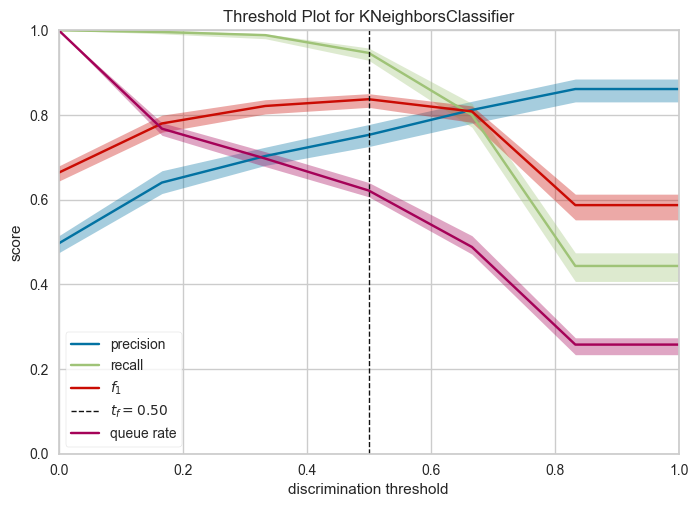

[['Model', 'Precision(0)', 'Recall(0)', 'F1_score(0)', 'Precision(1)', 'Recall(1)', 'F1_score(1)', 'Accuracy'], ['NoBalance_KNN', '0.82', '0.86', '0.84', '0.58', '0.50', '0.54', '0.76'], ['SMOTE_KNN', '0.93', '0.80', '0.86', '0.61', '0.84', '0.71', '0.81'], ['RandomOverSampler_KNN', '0.91', '0.74', '0.82', '0.55', '0.82', '0.66', '0.76'], ['ADASYN_KNN', '0.94', '0.76', '0.84', '0.59', '0.88', '0.71', '0.79']]


In [59]:
ads = ADASYN(random_state=0)
ads_smote_X,ads_smote_Y = ads.fit_resample(smote_train_X,smote_train_Y)
ads_smote_X = pd.DataFrame(data = ads_smote_X,columns=cols)
ads_smote_Y = pd.DataFrame(data = ads_smote_Y,columns=target_col)

telecom_churn_prediction_alg(knn,ads_smote_X,test_X,
                                ads_smote_Y,test_Y,threshold_plot = True)
name = "ADASYN_KNN"
table = Return_Analisys(knn,ads_smote_X,test_X,ads_smote_Y,test_Y,table,name)

Borderline

True positive data:  [354, 1781, 5567, 377, 3631, 2568, 5677, 5263, 4951, 5774, 177, 6091, 6313, 27, 6023, 6368, 3750, 2, 2524, 238, 4751, 1245, 5958, 1210, 4840, 4893, 3442, 6645, 5061, 2049, 542, 3720, 288, 2082, 1003, 637, 95, 6293, 3667, 5773, 5068, 4510, 2388, 722, 4966, 4440, 5336, 5882, 6142, 1287, 4221, 6598, 4803, 5868, 6897, 5297, 1384, 2999, 430, 1988, 5590, 759, 5169, 2866, 5423, 6247, 721, 1232, 4885, 3556, 3615, 3489, 2764, 6941, 3625, 2064, 4854, 3868, 5381, 1037, 6932, 4223, 3130, 6137, 1697, 168, 3602, 6778, 1976, 2158, 3597, 3467, 1472, 4038, 3080, 1802, 6435, 6851, 3260, 5350, 6030, 6160, 2124, 3870, 6181, 5178, 1155, 1330, 6582, 3365, 5947, 3773, 173, 992, 6607, 5279, 3420, 166, 1734, 3861, 6888, 3559, 2163, 5598, 2081, 5959, 6543, 679, 5556, 3883, 649, 36, 3707, 2505, 4082, 925, 3409, 4939, 4074, 2487, 3025, 1145, 5115, 6116, 453, 4645, 3368, 1356, 6348, 5803, 5706, 2001, 5564, 2573, 1480, 1405, 4056, 6529, 3328, 5248, 809, 3969, 185, 994, 5041, 2606, 6849, 151, 58

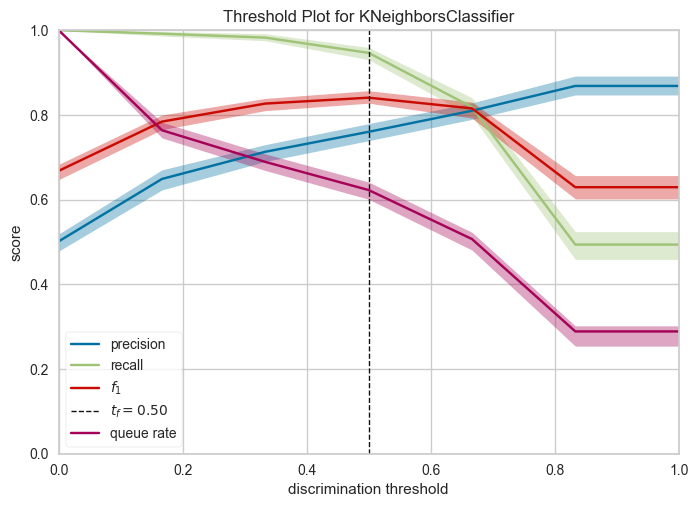

[['Model', 'Precision(0)', 'Recall(0)', 'F1_score(0)', 'Precision(1)', 'Recall(1)', 'F1_score(1)', 'Accuracy'], ['NoBalance_KNN', '0.82', '0.86', '0.84', '0.58', '0.50', '0.54', '0.76'], ['SMOTE_KNN', '0.93', '0.80', '0.86', '0.61', '0.84', '0.71', '0.81'], ['RandomOverSampler_KNN', '0.91', '0.74', '0.82', '0.55', '0.82', '0.66', '0.76'], ['ADASYN_KNN', '0.94', '0.76', '0.84', '0.59', '0.88', '0.71', '0.79'], ['BorderlineSMOTE_KNN', '0.93', '0.77', '0.85', '0.59', '0.86', '0.70', '0.80']]


In [60]:
bl = BorderlineSMOTE(random_state=0)
bl_smote_X,bl_smote_Y = bl.fit_resample(smote_train_X,smote_train_Y)
bl_smote_X = pd.DataFrame(data = bl_smote_X,columns=cols)
bl_smote_Y = pd.DataFrame(data = bl_smote_Y,columns=target_col)

telecom_churn_prediction_alg(knn,bl_smote_X,test_X,
                                bl_smote_Y,test_Y,threshold_plot = True)
name = "BorderlineSMOTE_KNN"
table = Return_Analisys(knn,bl_smote_X,test_X,bl_smote_Y,test_Y,table,name)

RandomUnderSampling

True positive data:  [354, 1781, 5567, 377, 2568, 5677, 5263, 4951, 5774, 177, 6091, 6313, 27, 6023, 6368, 863, 3750, 2, 238, 4751, 1245, 5958, 1210, 4840, 4893, 3442, 6645, 5061, 542, 3720, 288, 6625, 2082, 1003, 637, 95, 6293, 3667, 5773, 5068, 4510, 2388, 722, 4440, 5336, 5882, 6142, 1287, 4221, 6598, 4803, 6897, 5297, 1384, 2999, 430, 1988, 5590, 759, 5169, 2866, 5423, 6247, 721, 1232, 4885, 3556, 3615, 3489, 318, 2764, 6941, 3625, 2064, 4854, 3868, 5381, 1037, 6932, 4223, 3130, 6137, 1697, 168, 3602, 6778, 1976, 2158, 3597, 3467, 4038, 3080, 1802, 6851, 3260, 5350, 6030, 6160, 2124, 6181, 5178, 1155, 1330, 6582, 3365, 5947, 173, 992, 6607, 3587, 543, 5279, 6515, 3420, 166, 1734, 3861, 6888, 3559, 2163, 2081, 6543, 679, 5556, 5899, 6958, 3883, 649, 36, 3707, 2505, 4082, 925, 4939, 4074, 2487, 3025, 1145, 5115, 6116, 453, 3368, 1356, 5803, 5706, 2001, 5564, 2573, 1480, 1405, 4056, 6529, 3328, 5248, 809, 3969, 185, 994, 5041, 2606, 6849, 151, 5816, 6480, 2633, 931, 6425, 6770, 4523, 

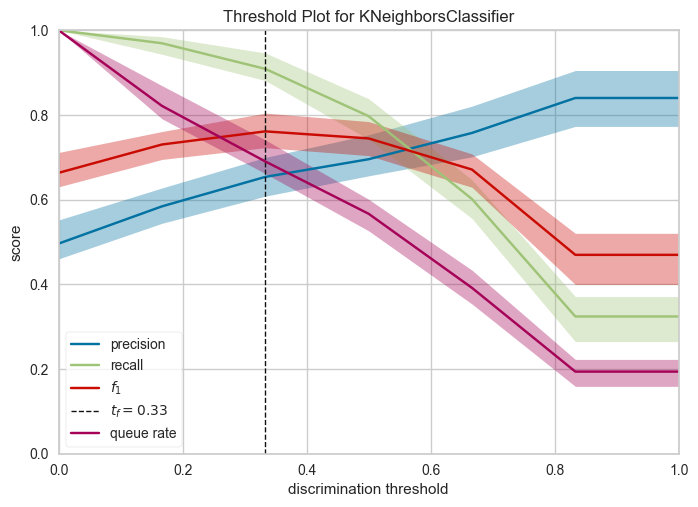

[['Model', 'Precision(0)', 'Recall(0)', 'F1_score(0)', 'Precision(1)', 'Recall(1)', 'F1_score(1)', 'Accuracy'], ['NoBalance_KNN', '0.82', '0.86', '0.84', '0.58', '0.50', '0.54', '0.76'], ['SMOTE_KNN', '0.93', '0.80', '0.86', '0.61', '0.84', '0.71', '0.81'], ['RandomOverSampler_KNN', '0.91', '0.74', '0.82', '0.55', '0.82', '0.66', '0.76'], ['ADASYN_KNN', '0.94', '0.76', '0.84', '0.59', '0.88', '0.71', '0.79'], ['BorderlineSMOTE_KNN', '0.93', '0.77', '0.85', '0.59', '0.86', '0.70', '0.80'], ['RandomUnderSampler_KNN', '0.91', '0.70', '0.79', '0.52', '0.82', '0.63', '0.74']]


In [61]:
cols    = [i for i in telcom.columns if i not in Id_col+target_col]
rus_X = telcom[cols]
rus_Y = telcom[target_col]

#Split train and test data
rus_train_X,rus_test_X,rus_train_Y,rus_test_Y = train_test_split(rus_X,rus_Y,
                                                                         test_size = .3 ,
                                                                         random_state = 0)

# Define the undersampler 
us = RandomUnderSampler(sampling_strategy='majority') 
# Undersample the data 
us_rus_X,us_rus_Y = us.fit_resample(rus_train_X,rus_train_Y) 
us_rus_X = pd.DataFrame(data = us_rus_X,columns=cols)
us_rus_Y = pd.DataFrame(data = us_rus_Y,columns=target_col)

   
telecom_churn_prediction_alg(knn,us_rus_X,test_X,
                             us_rus_Y,test_Y,threshold_plot = True)
name = "RandomUnderSampler_KNN"
table = Return_Analisys(knn,us_rus_X,test_X,us_rus_Y,test_Y,table,name)

NearMiss

True positive data:  [354, 5567, 377, 4726, 5677, 5263, 4951, 5774, 177, 6091, 6313, 6023, 6368, 2524, 238, 4751, 5958, 4840, 4893, 3442, 6645, 542, 3720, 288, 6625, 2082, 1003, 95, 3667, 5773, 5068, 4510, 2388, 722, 4440, 5882, 6142, 1287, 4221, 4803, 5297, 1384, 430, 5590, 759, 5169, 2866, 721, 1232, 3556, 3615, 3489, 6941, 3625, 2064, 4854, 5381, 1037, 4223, 6137, 1697, 168, 3602, 1962, 6778, 2158, 3467, 3080, 1802, 6435, 6851, 3260, 5350, 6030, 2124, 3870, 6181, 5178, 1155, 1330, 6582, 5947, 173, 992, 6607, 4410, 543, 5279, 3420, 166, 1734, 3861, 6888, 3559, 2163, 2081, 6543, 679, 5556, 649, 2505, 4939, 4074, 2487, 3025, 1145, 5115, 6116, 453, 4645, 5803, 5564, 2573, 1480, 1405, 4056, 6529, 3328, 5248, 809, 185, 994, 2606, 6849, 151, 6480, 2633, 931, 6425, 6770, 4523, 6588, 4997, 3932, 3073, 2450, 6511, 1281, 1778, 514, 4491, 4385, 961, 306, 6278, 191, 3085, 741, 2813, 824, 3037, 6228, 4875, 1851, 5975, 5031, 2203, 2099, 4767, 874, 2748, 4077, 2319, 4397, 5535, 2703, 3354, 3178, 18

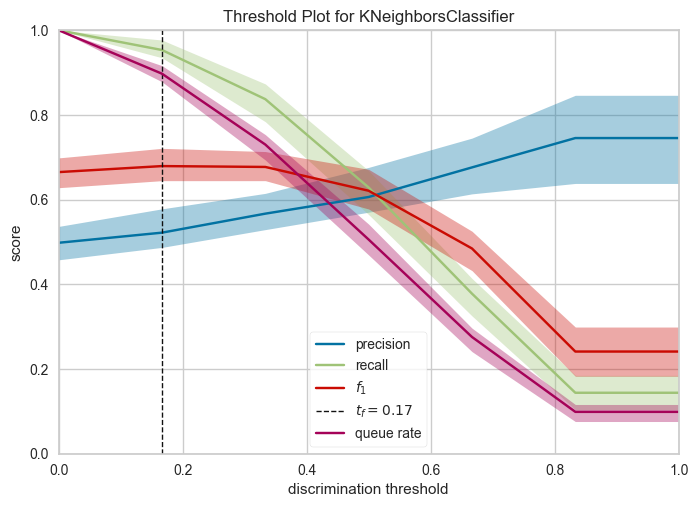

[['Model', 'Precision(0)', 'Recall(0)', 'F1_score(0)', 'Precision(1)', 'Recall(1)', 'F1_score(1)', 'Accuracy'], ['NoBalance_KNN', '0.82', '0.86', '0.84', '0.58', '0.50', '0.54', '0.76'], ['SMOTE_KNN', '0.93', '0.80', '0.86', '0.61', '0.84', '0.71', '0.81'], ['RandomOverSampler_KNN', '0.91', '0.74', '0.82', '0.55', '0.82', '0.66', '0.76'], ['ADASYN_KNN', '0.94', '0.76', '0.84', '0.59', '0.88', '0.71', '0.79'], ['BorderlineSMOTE_KNN', '0.93', '0.77', '0.85', '0.59', '0.86', '0.70', '0.80'], ['RandomUnderSampler_KNN', '0.91', '0.70', '0.79', '0.52', '0.82', '0.63', '0.74'], ['NearMiss_KNN', '0.82', '0.63', '0.71', '0.40', '0.63', '0.49', '0.63']]


In [62]:
#import Nearmiss
nm = NearMiss(sampling_strategy='majority' ) 
#chuyển dữ liệu
nm_rus_X,nm_rus_Y= nm.fit_resample(rus_train_X,rus_train_Y)
#chuyển dữ liệu thành dataframe
nm_rus_X = pd.DataFrame(data = nm_rus_X,columns=cols)
nm_rus_Y = pd.DataFrame(data = nm_rus_Y,columns=target_col)
#Knn model
telecom_churn_prediction_alg(knn,nm_rus_X,test_X,
                             nm_rus_Y,test_Y,threshold_plot = True)
name = "NearMiss_KNN"
table = Return_Analisys(knn,nm_rus_X,test_X,nm_rus_Y,test_Y,table,name)

Tomek Links 

True positive data:  [354, 5567, 377, 2568, 5677, 5263, 4951, 5774, 177, 6091, 6313, 27, 6023, 6368, 863, 3750, 238, 4751, 5958, 1210, 4840, 4893, 3442, 6645, 5061, 542, 3720, 288, 2082, 1003, 637, 95, 6293, 3667, 5773, 5068, 4510, 722, 4440, 5882, 6142, 1287, 4221, 4803, 5297, 1384, 2999, 430, 1988, 5590, 759, 5169, 2866, 5423, 721, 1232, 3556, 3615, 3489, 318, 6941, 3625, 2064, 4854, 3868, 5381, 1037, 4223, 6137, 1697, 168, 3602, 6778, 1976, 2158, 3467, 3080, 1802, 6851, 3260, 5350, 6030, 2124, 6181, 5178, 1155, 1330, 6582, 3365, 5947, 173, 6607, 5279, 3420, 166, 1734, 3861, 6888, 3559, 2163, 2081, 6543, 679, 5556, 649, 3707, 2505, 925, 4939, 4074, 2487, 3025, 1145, 5115, 6116, 453, 1356, 5803, 2001, 5564, 2573, 1480, 1405, 4056, 6529, 3328, 5248, 3969, 185, 994, 5041, 2606, 6849, 151, 5816, 6480, 2633, 931, 6425, 6770, 4523, 6588, 3932, 3073, 2450, 6511, 1281, 1778, 514, 4491, 4385, 961, 306, 6278, 191, 3085, 741, 824, 6228, 4875, 3767, 5975, 2521, 5031, 2203, 2099, 4767, 874, 2748,

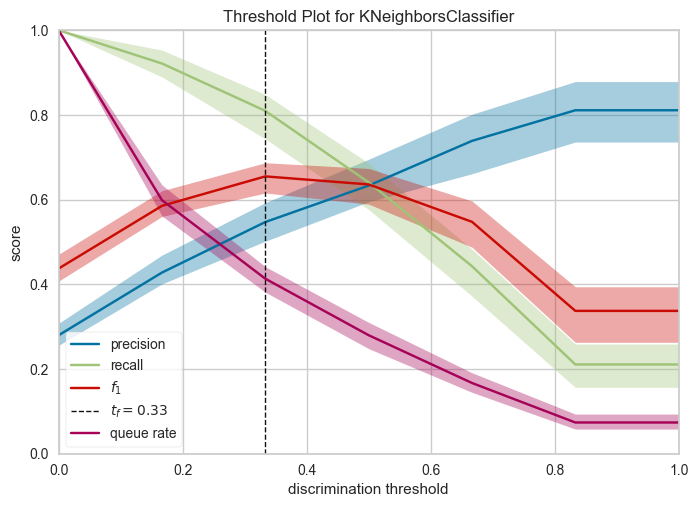

[['Model', 'Precision(0)', 'Recall(0)', 'F1_score(0)', 'Precision(1)', 'Recall(1)', 'F1_score(1)', 'Accuracy'], ['NoBalance_KNN', '0.82', '0.86', '0.84', '0.58', '0.50', '0.54', '0.76'], ['SMOTE_KNN', '0.93', '0.80', '0.86', '0.61', '0.84', '0.71', '0.81'], ['RandomOverSampler_KNN', '0.91', '0.74', '0.82', '0.55', '0.82', '0.66', '0.76'], ['ADASYN_KNN', '0.94', '0.76', '0.84', '0.59', '0.88', '0.71', '0.79'], ['BorderlineSMOTE_KNN', '0.93', '0.77', '0.85', '0.59', '0.86', '0.70', '0.80'], ['RandomUnderSampler_KNN', '0.91', '0.70', '0.79', '0.52', '0.82', '0.63', '0.74'], ['NearMiss_KNN', '0.82', '0.63', '0.71', '0.40', '0.63', '0.49', '0.63'], ['TomekLinks_KNN', '0.87', '0.85', '0.86', '0.64', '0.68', '0.66', '0.80']]


In [63]:
# Define the undersampler 
tl = TomekLinks(sampling_strategy='majority') 
tl_rus_X,tl_rus_Y= tl.fit_resample(rus_train_X,rus_train_Y)
tl_rus_X = pd.DataFrame(data = tl_rus_X,columns=cols)
tl_rus_Y = pd.DataFrame(data = tl_rus_Y,columns=target_col)
#Knn model
telecom_churn_prediction_alg(knn,tl_rus_X,test_X,
                             tl_rus_Y,test_Y,threshold_plot = True)
name = "TomekLinks_KNN"
table = Return_Analisys(knn,tl_rus_X,test_X,tl_rus_Y,test_Y,table,name)

ClusterCentroids

True positive data:  [354, 1781, 5567, 377, 3631, 2568, 5677, 5263, 4951, 5774, 177, 6091, 6313, 27, 6023, 6368, 863, 3750, 2, 238, 4751, 1245, 5958, 1210, 4840, 4893, 6736, 3442, 6645, 5061, 2049, 542, 3720, 288, 6625, 2082, 1003, 637, 95, 6293, 3667, 5773, 5068, 4510, 2388, 722, 4966, 4440, 5336, 5882, 6142, 1287, 4221, 6598, 4803, 6897, 5297, 1384, 2999, 5379, 430, 1988, 5590, 759, 5169, 2866, 5423, 6247, 721, 1232, 4885, 3556, 3615, 3489, 318, 2764, 6941, 3625, 2064, 4854, 3868, 5381, 1037, 6932, 4223, 5104, 3130, 6137, 1697, 6312, 168, 3602, 6778, 1976, 2158, 3597, 3467, 1472, 4038, 3080, 1802, 6435, 4974, 6851, 3260, 5350, 6030, 6160, 2124, 6181, 5178, 1155, 1330, 6582, 3365, 5947, 173, 992, 6607, 3587, 543, 5279, 6515, 3420, 166, 1734, 3861, 6888, 3559, 2163, 2081, 6543, 679, 5556, 6167, 5899, 6958, 3883, 649, 36, 3707, 2505, 4082, 925, 3409, 4939, 4074, 2487, 3025, 1145, 5115, 6116, 453, 3368, 1356, 5803, 5706, 2001, 5564, 2573, 1480, 1405, 4056, 6529, 6549, 3328, 5248, 809, 39

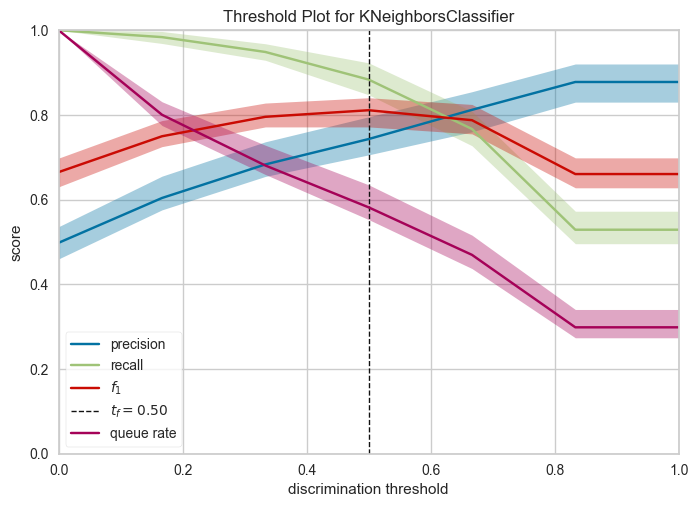

[['Model', 'Precision(0)', 'Recall(0)', 'F1_score(0)', 'Precision(1)', 'Recall(1)', 'F1_score(1)', 'Accuracy'], ['NoBalance_KNN', '0.82', '0.86', '0.84', '0.58', '0.50', '0.54', '0.76'], ['SMOTE_KNN', '0.93', '0.80', '0.86', '0.61', '0.84', '0.71', '0.81'], ['RandomOverSampler_KNN', '0.91', '0.74', '0.82', '0.55', '0.82', '0.66', '0.76'], ['ADASYN_KNN', '0.94', '0.76', '0.84', '0.59', '0.88', '0.71', '0.79'], ['BorderlineSMOTE_KNN', '0.93', '0.77', '0.85', '0.59', '0.86', '0.70', '0.80'], ['RandomUnderSampler_KNN', '0.91', '0.70', '0.79', '0.52', '0.82', '0.63', '0.74'], ['NearMiss_KNN', '0.82', '0.63', '0.71', '0.40', '0.63', '0.49', '0.63'], ['TomekLinks_KNN', '0.87', '0.85', '0.86', '0.64', '0.68', '0.66', '0.80'], ['ClusterCentroids_KNN', '0.94', '0.55', '0.69', '0.44', '0.91', '0.59', '0.65']]


In [64]:
cc = ClusterCentroids(sampling_strategy='majority')
cc_rus_X,cc_rus_Y= cc.fit_resample(rus_train_X,rus_train_Y)
cc_rus_X = pd.DataFrame(data = cc_rus_X,columns=cols)
cc_rus_Y = pd.DataFrame(data = cc_rus_Y,columns=target_col)
#Knn model
telecom_churn_prediction_alg(knn,cc_rus_X,test_X,
                             cc_rus_Y,test_Y,threshold_plot = True)
name = "ClusterCentroids_KNN"
table = Return_Analisys(knn,cc_rus_X,test_X,cc_rus_Y,test_Y,table,name)

EditedNearesNeighbours

True positive data:  [354, 1781, 5567, 377, 2568, 5677, 5263, 4951, 5774, 177, 6091, 6313, 27, 6023, 6368, 863, 3750, 2, 238, 4751, 1245, 5958, 1210, 4840, 4893, 3442, 6645, 5061, 2049, 542, 3720, 288, 6625, 2082, 1003, 637, 95, 6293, 3667, 5773, 5068, 4510, 2388, 722, 4966, 4440, 5336, 5882, 6142, 1287, 4221, 6598, 4803, 6897, 5297, 1384, 2999, 430, 1988, 5590, 759, 5169, 2866, 5423, 6247, 721, 1232, 4885, 3556, 3615, 3489, 318, 6941, 3625, 2064, 4854, 3868, 5381, 1037, 6932, 4223, 3130, 6137, 1697, 168, 3602, 6778, 1976, 2158, 3597, 3467, 1472, 4038, 3080, 1802, 6851, 3260, 5350, 6030, 6160, 2124, 6181, 5178, 1155, 1330, 6582, 3365, 5947, 173, 992, 6607, 3587, 543, 5279, 6515, 3420, 166, 1734, 3861, 6888, 3559, 2163, 5598, 2081, 6543, 679, 5556, 6167, 5899, 6958, 3883, 649, 36, 3707, 2505, 4082, 925, 3409, 4939, 4074, 2487, 3025, 1145, 5115, 6116, 453, 4645, 3368, 1356, 5803, 5706, 2001, 5564, 2573, 1480, 1405, 4056, 6529, 3328, 5248, 809, 3969, 185, 994, 5041, 2606, 6849, 151, 5816,

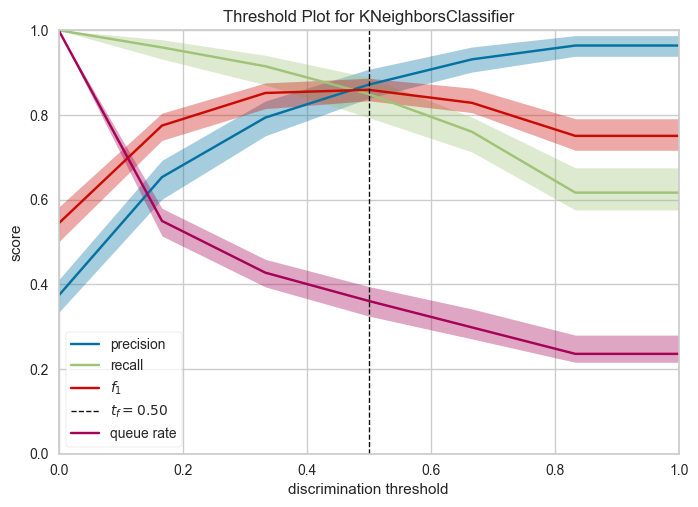

[['Model', 'Precision(0)', 'Recall(0)', 'F1_score(0)', 'Precision(1)', 'Recall(1)', 'F1_score(1)', 'Accuracy'], ['NoBalance_KNN', '0.82', '0.86', '0.84', '0.58', '0.50', '0.54', '0.76'], ['SMOTE_KNN', '0.93', '0.80', '0.86', '0.61', '0.84', '0.71', '0.81'], ['RandomOverSampler_KNN', '0.91', '0.74', '0.82', '0.55', '0.82', '0.66', '0.76'], ['ADASYN_KNN', '0.94', '0.76', '0.84', '0.59', '0.88', '0.71', '0.79'], ['BorderlineSMOTE_KNN', '0.93', '0.77', '0.85', '0.59', '0.86', '0.70', '0.80'], ['RandomUnderSampler_KNN', '0.91', '0.70', '0.79', '0.52', '0.82', '0.63', '0.74'], ['NearMiss_KNN', '0.82', '0.63', '0.71', '0.40', '0.63', '0.49', '0.63'], ['TomekLinks_KNN', '0.87', '0.85', '0.86', '0.64', '0.68', '0.66', '0.80'], ['ClusterCentroids_KNN', '0.94', '0.55', '0.69', '0.44', '0.91', '0.59', '0.65'], ['EditedNearestNeighbours_KNN', '0.93', '0.69', '0.79', '0.52', '0.86', '0.65', '0.74']]


In [65]:
edn = EditedNearestNeighbours(sampling_strategy='majority')
edn_rus_X,edn_rus_Y= edn.fit_resample(rus_train_X,rus_train_Y)
edn_rus_X = pd.DataFrame(data = edn_rus_X,columns=cols)
edn_rus_Y = pd.DataFrame(data = edn_rus_Y,columns=target_col)
#Knn model
telecom_churn_prediction_alg(knn,edn_rus_X,test_X,
                             edn_rus_Y,test_Y,threshold_plot = True)
name = "EditedNearestNeighbours_KNN"
table = Return_Analisys(knn,edn_rus_X,test_X,edn_rus_Y,test_Y,table,name)

In [66]:
df = pd.DataFrame(data =table,columns=table[0])
df.drop(0, inplace = True)
# Add asterisk to the maximum value in each column
c_max =[]
for i in df.columns:
    if i != "Model":
        c_max.append(df[i].max())
for k in range(1,len(df.columns)):
    for i in range(1,len(df[df.columns[k]])):
        if df[df.columns[k]][i] == c_max[k-1]:
            df[df.columns[k]][i] = df[df.columns[k]][i] + str("*")
df

,Model,Precision(0),Recall(0),F1_score(0),Precision(1),Recall(1),F1_score(1),Accuracy
1,NoBalance_KNN,0.82,0.86*,0.84,0.58,0.50,0.54,0.76
2,SMOTE_KNN,0.93,0.80,0.86*,0.61,0.84,0.71*,0.81*
3,RandomOverSampler_KNN,0.91,0.74,0.82,0.55,0.82,0.66,0.76
4,ADASYN_KNN,0.94*,0.76,0.84,0.59,0.88,0.71*,0.79
5,BorderlineSMOTE_KNN,0.93,0.77,0.85,0.59,0.86,0.70,0.80
6,RandomUnderSampler_KNN,0.91,0.70,0.79,0.52,0.82,0.63,0.74
7,NearMiss_KNN,0.82,0.63,0.71,0.40,0.63,0.49,0.63
8,TomekLinks_KNN,0.87,0.85,0.86*,0.64*,0.68,0.66,0.80
9,ClusterCentroids_KNN,0.94*,0.55,0.69,0.44,0.91*,0.59,0.65
10,EditedNearestNeighbours_KNN,0.93,0.69,0.79,0.52,0.86,0.65,0.74


### Kết luận

Qua bảng thống kê trên chọn được mô hình KNN và cách xử lý data với SMOTE